## Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [9]:
df = pd.read_csv('kc-house-data.csv', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

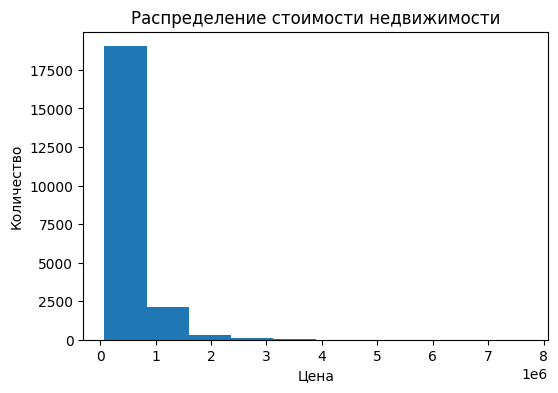

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

Вывод: Стоимость недвижимости обратно пропорциональна её количеству.

### 1.3 Изучите распределение квадратуры жилой

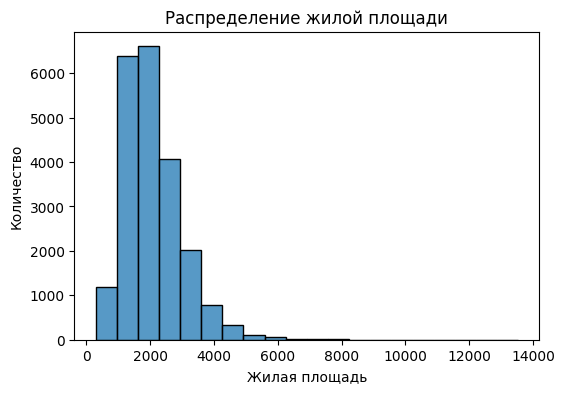

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

Вывод: Количество недвижимости до величины жилой площади 2000 ф.кв. растёт пропорционально размеру её жилой площади.
В дальнейшем, при росте площади количество недвижимости снижается, т.е. количество обратно пропорционально её размеру.

### 1.4 Изучите распределение года постройки

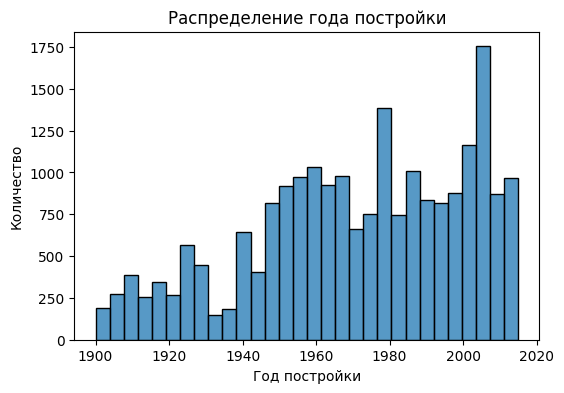

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Вывод: Количество недвижимости обратно пропорционально её возрасту.

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

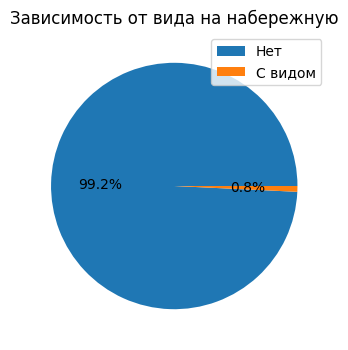

In [13]:
vid = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(vid, autopct='%1.1f%%')
plt.legend(['Нет', 'С видом']);
plt.title('Зависимость от вида на набережную');

Вывод: Количество недвижимости с видом на набережную составляет менее 1%.

### 2.2 Изучите распределение этажей домов

Text(0, 0.5, 'Количество недвижимости')

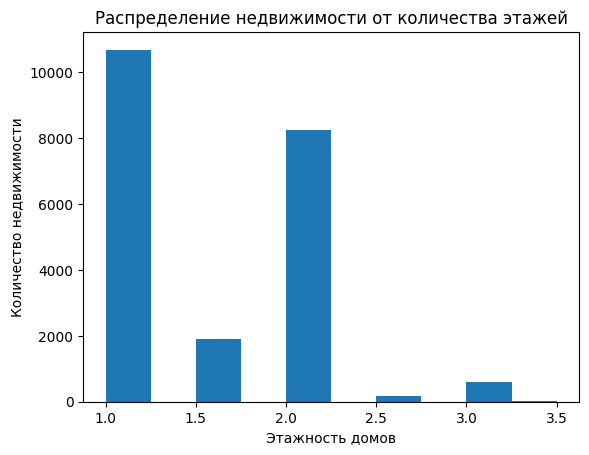

In [15]:
plt.hist(df['floors'])
plt.title('Распределение недвижимости от количества этажей')
plt.xlabel('Этажность домов')
plt.ylabel('Количество недвижимости')

Вывод: Наибольшее количество недвижимости имеет 1 или 2 этажа.

### 2.3 Изучите распределение состояния домов

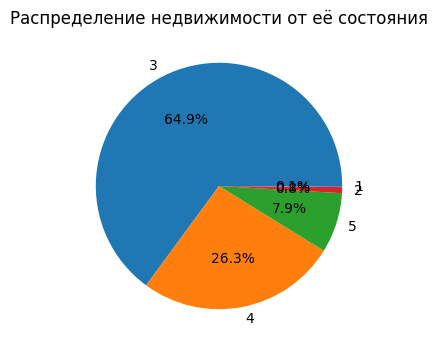

In [20]:
cond_houses = df['condition'].value_counts()
plt.figure(figsize=(6, 4))
plt.title('Распределение недвижимости от её состояния')
plt.pie(cond_houses, autopct='%1.1f%%', labels=cond_houses.index);

Вывод: Наибольшее количество недвижимости имеет соостояние равное 3.

## Условие 3: 3 задача
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [21]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


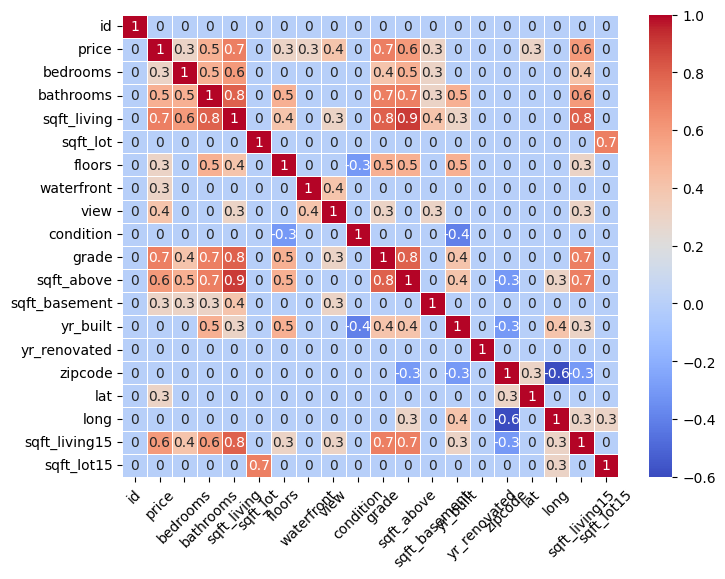

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.xticks(rotation=45);

### 3.1 Зависимость от оценки вида

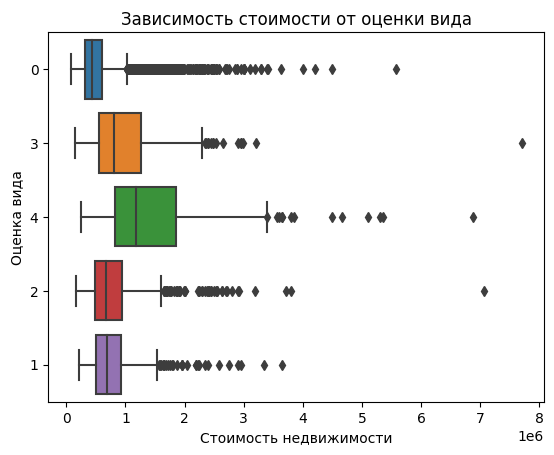

In [29]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Оценка вида')
plt.title('Зависимость стоимости от оценки вида');

Вывод: Наибольшую стоимость имеет недвижимость с оценкой вида равной 4.

### 3.2 Зависимость от оценки дизайна

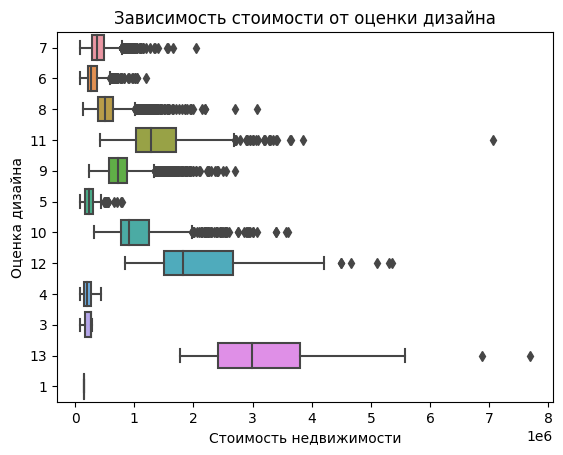

In [31]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Оценка дизайна')
plt.title('Зависимость стоимости от оценки дизайна');

Вывод: Наибольшую стоимость имеет недвижимость с оценкой дизайна равной 13.

### 3.3 Зависимость от площади недвижимости

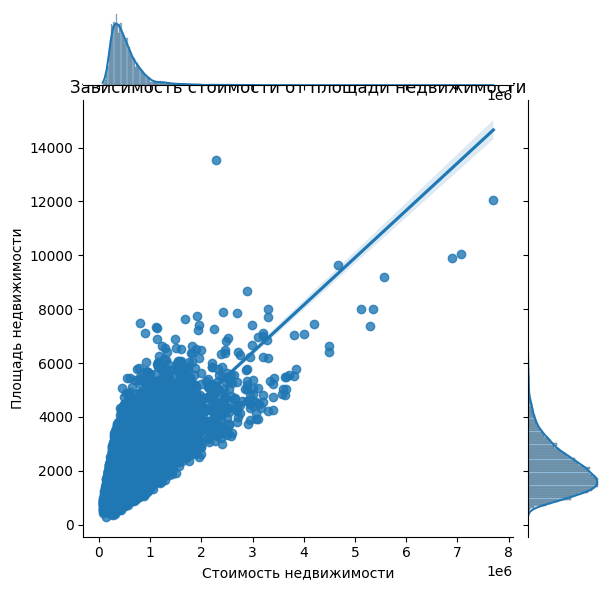

In [37]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Площадь недвижимости')
plt.title('Зависимость стоимости от площади недвижимости');

Вывод: Стоимость недвижимости напрямую зависит от её площади.

### 3.4 Зависимость от количества этажей

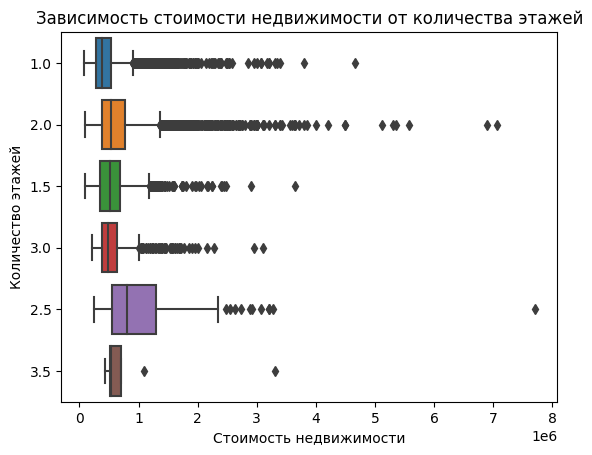

In [38]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество этажей')
plt.title('Зависимость стоимости недвижимости от количества этажей');

Вывод: Наибольшую стоимость имеет недвижимость с количеством этажей равным 2,5.

### 3.5 Зависимость стоимости недвижимости от количества спален

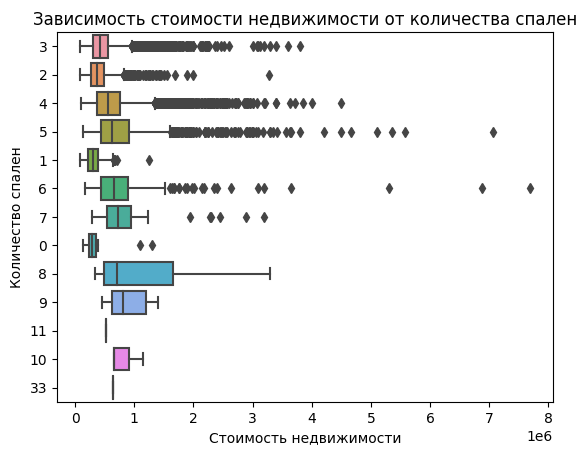

In [41]:
sns.boxplot(x=df['price'], y=df['bedrooms'].astype('str'), whis=1.5);
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Количество спален')
plt.title('Зависимость стоимости недвижимости от количества спален');

Вывод: Наибольшую стоимость имеет недвижимость с количеством спален равным 8.